# Annual modulation of the DM-electron scattering rate in Xenon

We pre-tabulate the values of $g(v_{\rm min},t)$ in the file `erec/Tabulate_gmin.py` so that we don't need to worry about that. Then here we just calculate the rates for each day in those tables.

In [1]:
import sys
sys.path.append('../erec')
from numpy import *
import matplotlib.pyplot as plt
from LabFuncs import *
from Params import *
from DMFuncs import *
from PlotFuncs import *
from HaloFuncs import *
from Params import *
from AtomicFuncs import *

dat1 = loadtxt('../data/gvmin/gvmin_Halo.txt')
nt = shape(dat1)[0]-1
vmin = dat1[0,:]
nv = size(vmin)
gmin_Halo = dat1[1:,:]

dat1 = loadtxt('../data/gvmin/gvmin_Saus.txt')
gmin_Saus = dat1[1:,:]

dat1 = loadtxt('../data/gvmin/gvmin_S1.txt')
gmin_S1 = dat1[1:,:]

dat1 = loadtxt('../data/gvmin/gvmin_S2.txt')
gmin_S2 = dat1[1:,:]

days = linspace(0.0,365-365/(1.0*nt),nt)

In [2]:
gmin_SHMpp = (1-0.2)*gmin_Halo + 0.2*gmin_Saus

np = 20 # accuracy of p integral
nq = 20 # accuracy of q integral
ne = 100 # number of energies

sigma_e = 1.0e-37 # cm^2
E_r_vals = logspace(-1.0,3.0,ne)/1000.0 # keV

nm = 2
m = [10.0,1000.0]

R_H_SHMpp = zeros(shape=(nt,ne,nm))
R_L_SHMpp = zeros(shape=(nt,ne,nm))
R_H_S1 = zeros(shape=(nt,ne,nm))
R_L_S1 = zeros(shape=(nt,ne,nm))
R_H_S2 = zeros(shape=(nt,ne,nm))
R_L_S2 = zeros(shape=(nt,ne,nm))
for mi in range(0,nm):
    R_H_SHMpp[:,:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,HeavyMediator,vmin,gmin_SHMpp,nq=nq)
    R_L_SHMpp[:,:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,LightMediator,vmin,gmin_SHMpp,nq=nq)

    R_H_S1[:,:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,HeavyMediator,vmin,gmin_S1,nq=nq)
    R_L_S1[:,:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,LightMediator,vmin,gmin_S1,nq=nq)

    R_H_S2[:,:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,HeavyMediator,vmin,gmin_S2,nq=nq)
    R_L_S2[:,:,mi] = ElectronRecoilRate(Xe131,E_r_vals,m[mi],sigma_e,LightMediator,vmin,gmin_S2,nq=nq)


No handles with labels found to put in legend.


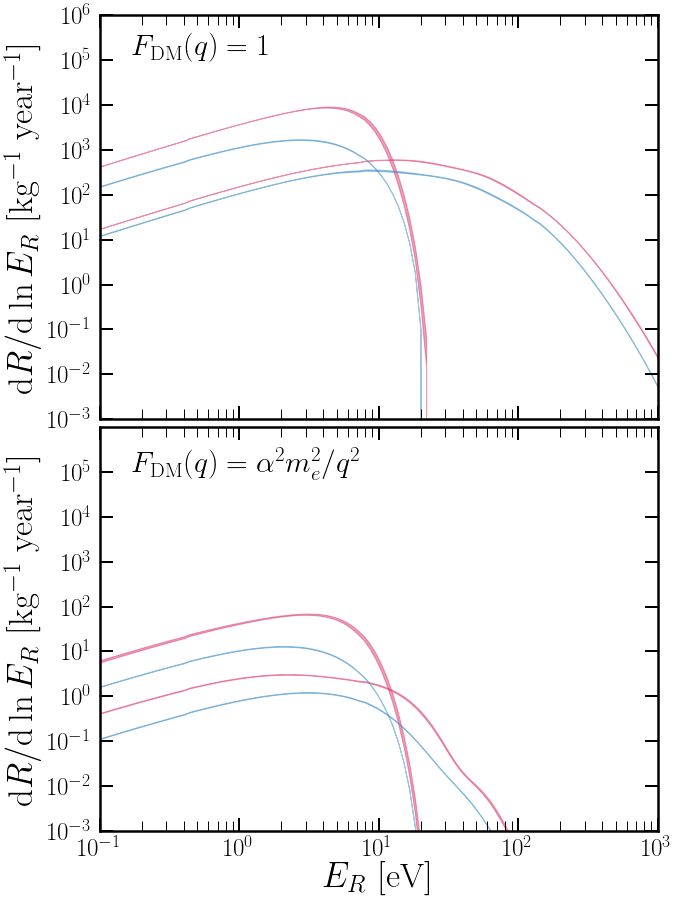

In [11]:
import cmocean
#####
# set up plot
hspace=0.02
lw=2.5
lfs=35
tfs=25
size_x=10
size_y=15

xlab2 = r'$E_R$ [eV]'
ylab2 = r'$\textrm{d}R/\textrm{d}\ln E_R$ [kg$^{-1}$ year$^{-1}$]'
ylab1 = r'$\textrm{d}R/\textrm{d}\ln E_R$ [kg$^{-1}$ year$^{-1}$]'
plt.rcParams['axes.linewidth'] = lw
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=tfs)
fig, axarr = plt.subplots(2, 1,figsize=(size_x,size_y))
gs = gridspec.GridSpec(2, 1)
gs.update(hspace=hspace)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
ax1.set_ylabel(ylab1,fontsize=lfs)
ax2.set_ylabel(ylab2,fontsize=lfs)
ax2.set_xlabel(xlab2,fontsize=lfs)
#####

# Plot    
x = E_r_vals*1000.0 
col = cmocean.cm.phase(linspace(0.2,0.6,2))


def plotHLrange(R_H,R_L,col,alph=0.5):
    fu0H = zeros(shape=ne)
    fl0H = zeros(shape=ne)
    fu1H = zeros(shape=ne)
    fl1H = zeros(shape=ne)
    fu0L = zeros(shape=ne)
    fl0L = zeros(shape=ne)
    fu1L = zeros(shape=ne)
    fl1L = zeros(shape=ne)
    for i in range(0,ne):
        fu0H[i] = amax(R_H[:,i,0])
        fl0H[i] = amin(R_H[:,i,0])
        fu1H[i] = amax(R_H[:,i,1])
        fl1H[i] = amin(R_H[:,i,1])
        fu0L[i] = amax(R_L[:,i,0])
        fl0L[i] = amin(R_L[:,i,0])
        fu1L[i] = amax(R_L[:,i,1])
        fl1L[i] = amin(R_L[:,i,1])
    

    ax1.fill_between(x,fu0H,y2=fl0H,color=col,alpha=alph)
    ax1.fill_between(x,fu1H,y2=fl1H,color=col,alpha=alph)
    ax2.fill_between(x,fu0L,y2=fl0L,color=col,alpha=alph)
    ax2.fill_between(x,fu1L,y2=fl1L,color=col,alpha=alph)

#     ax1.plot(x,fu0H,'-',lw=3,color=col)
#     ax1.plot(x,fu1H,'-',lw=3,color=col)   
#     ax2.plot(x,fu0L,'-',lw=3,color=col)
#     ax2.plot(x,fu1L,'-',lw=3,color=col)  
    
#     ax1.plot(x,fl0H,'-',lw=3,color=col)
#     ax1.plot(x,fl1H,'-',lw=3,color=col)   
#     ax2.plot(x,fl0L,'-',lw=3,color=col)
#     ax2.plot(x,fl1L,'-',lw=3,color=col)  

    return

xi = 0.2
R_H = R_H_SHMpp*(1-xi) + R_H_S1*xi
R_L = R_L_SHMpp*(1-xi) + R_L_S1*xi
plotHLrange(R_H,R_L,col[0,:],alph=0.5)

xi = 0.2
R_H = R_H_SHMpp*(1-xi) + R_H_S2*xi
R_L = R_L_SHMpp*(1-xi) + R_L_S2*xi
plotHLrange(R_H,R_L,col[1,:],alph=0.5)

# Tweak ranges on show
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim([0.1,1.0e3])
ax1.set_ylim([1.0e-3,1.0e6])
ax1.set_xticklabels([])
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim([0.1,1.0e3])
ax2.set_ylim([1.0e-3,1.0e6])
ax1.set_yticks(10.0**arange(-3,7))
ax2.set_yticks(10.0**arange(-3,6))

# Labels
ax1.legend(frameon=False,fontsize=25,labelspacing=0.1,borderpad=0.1,handlelength=1)
plt.gcf().text(0.17,0.84,r'$F_{\rm DM}(q) = 1$',fontsize=30)
plt.gcf().text(0.17,0.45,r'$F_{\rm DM}(q) = \alpha^2 m^2_e/q^2$',fontsize=30)

# Save
plt.show()
fig.savefig('../plots/DMRates_AnnualMod.pdf',bbox_inches='tight')


In [10]:
savetxt('../data/rates/dRdlnE_10GeV_HeavyMediator_SHMpp.txt',vstack((E_r_vals,R_H_SHMpp[:,:,0])),delimiter='\t',fmt="%1.12f")
savetxt('../data/rates/dRdlnE_1000GeV_HeavyMediator_SHMpp.txt',vstack((E_r_vals,R_H_SHMpp[:,:,1])),delimiter='\t',fmt="%1.12f")
savetxt('../data/rates/dRdlnE_10GeV_LightMediator_SHMpp.txt',vstack((E_r_vals,R_L_SHMpp[:,:,0])),delimiter='\t',fmt="%1.12f")
savetxt('../data/rates/dRdlnE_1000GeV_LightMediator_SHMpp.txt',vstack((E_r_vals,R_L_SHMpp[:,:,1])),delimiter='\t',fmt="%1.12f")

savetxt('../data/rates/dRdlnE_10GeV_HeavyMediator_S1.txt',vstack((E_r_vals,R_H_S1[:,:,0])),delimiter='\t',fmt="%1.12f")
savetxt('../data/rates/dRdlnE_1000GeV_HeavyMediator_S1.txt',vstack((E_r_vals,R_H_S1[:,:,1])),delimiter='\t',fmt="%1.12f")
savetxt('../data/rates/dRdlnE_10GeV_LightMediator_S1.txt',vstack((E_r_vals,R_L_S1[:,:,0])),delimiter='\t',fmt="%1.12f")
savetxt('../data/rates/dRdlnE_1000GeV_LightMediator_S1.txt',vstack((E_r_vals,R_L_S1[:,:,1])),delimiter='\t',fmt="%1.12f")

savetxt('../data/rates/dRdlnE_10GeV_HeavyMediator_S2.txt',vstack((E_r_vals,R_H_S2[:,:,0])),delimiter='\t',fmt="%1.12f")
savetxt('../data/rates/dRdlnE_1000GeV_HeavyMediator_S2.txt',vstack((E_r_vals,R_H_S2[:,:,1])),delimiter='\t',fmt="%1.12f")
savetxt('../data/rates/dRdlnE_10GeV_LightMediator_S2.txt',vstack((E_r_vals,R_L_S2[:,:,0])),delimiter='\t',fmt="%1.12f")
savetxt('../data/rates/dRdlnE_1000GeV_LightMediator_S2.txt',vstack((E_r_vals,R_L_S2[:,:,1])),delimiter='\t',fmt="%1.12f")

